In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fbprophet import Prophet

In [0]:
df = pd.read_csv('fruits.csv')
df['y'] = (df['x'] - df['x'].mean()) / (df['x'].std())
df.head()

,ds,x,y
0,2014/12/30,4.5,-1.812723
1,2015/1/3,63.3,-1.707174
2,2015/1/4,118.5,-1.608088
3,2015/1/5,38.9,-1.750973
4,2015/1/6,184.5,-1.489615


In [0]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2015-01-01', '2015-01-02', '2015-01-03',
                        '2015-02-18','2015-02-19','2015-02-20','2015-02-21','2015-02-22',
                       '2015-02-23','2015-02-24','2015-04-04','2015-04-05','2015-04-06']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime([ '2015-05-01','2015-05-02','2015-05-03','2015-06-20','2015-06-21','2015-06-22']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

m = Prophet(holidays=holidays, holidays_prior_scale=10.0)

In [0]:
#m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = m.make_future_dataframe(periods=5)
future.tail()

,ds
174,2015-07-01
175,2015-07-02
176,2015-07-03
177,2015-07-04
178,2015-07-05


In [0]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,playoff,playoff_lower,playoff_upper,superbowl,superbowl_lower,superbowl_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
174,2015-07-01,1.309353,0.551043,2.101558,1.309353,1.309353,0.047801,0.047801,0.047801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047801,0.047801,0.047801,0.0,0.0,0.0,1.357155
175,2015-07-02,1.323462,0.739218,2.344884,1.323462,1.323462,0.176755,0.176755,0.176755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176755,0.176755,0.176755,0.0,0.0,0.0,1.500217
176,2015-07-03,1.337571,0.733880,2.354383,1.337571,1.337571,0.201174,0.201174,0.201174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.201174,0.201174,0.201174,0.0,0.0,0.0,1.538745
177,2015-07-04,1.351680,0.404695,1.988169,1.351680,1.351680,-0.163894,-0.163894,-0.163894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.163894,-0.163894,-0.163894,0.0,0.0,0.0,1.187786
178,2015-07-05,1.365789,0.345090,2.009597,1.365788,1.365789,-0.217965,-0.217965,-0.217965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.217965,-0.217965,-0.217965,0.0,0.0,0.0,1.147823


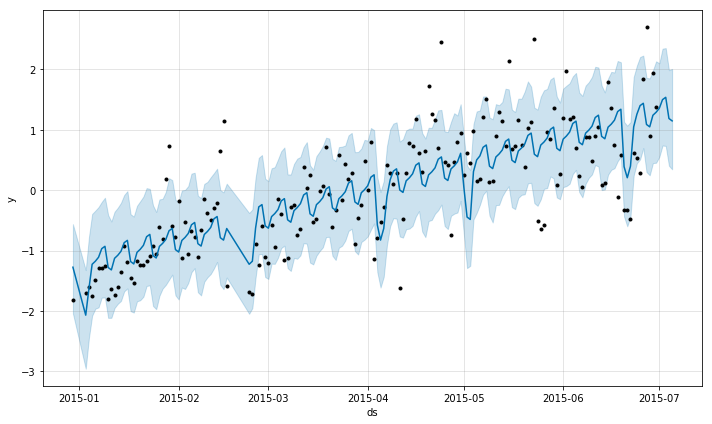

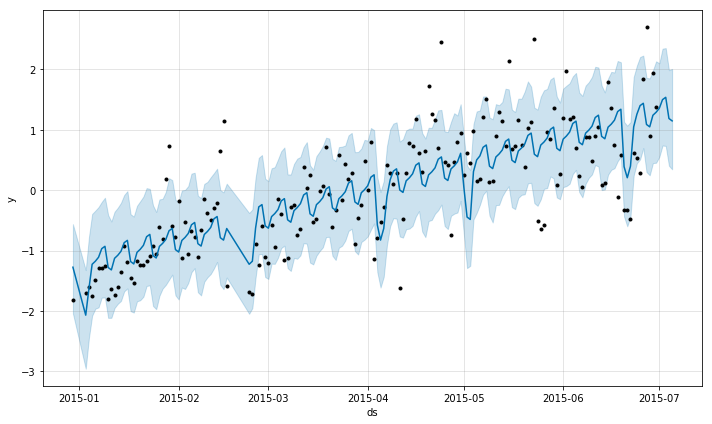

In [0]:
m.plot(forecast)

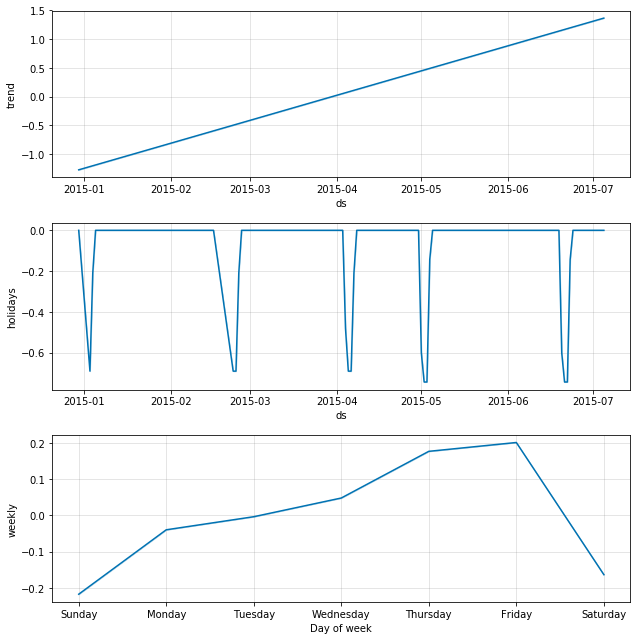

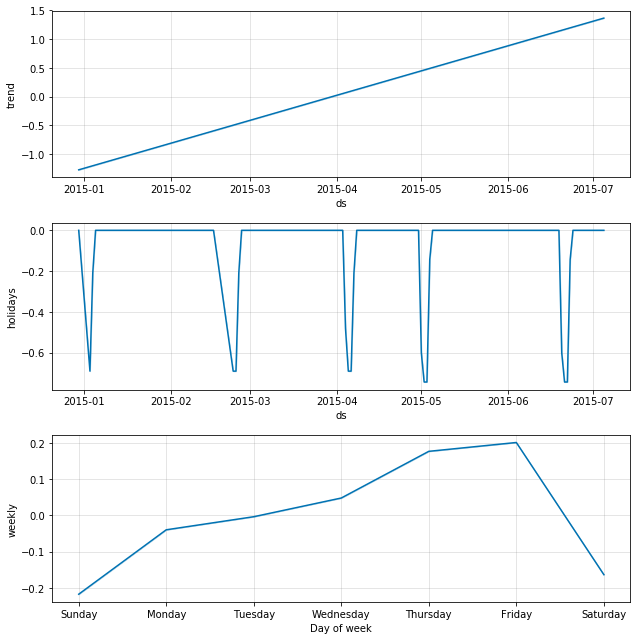

In [0]:
m.plot_components(forecast)

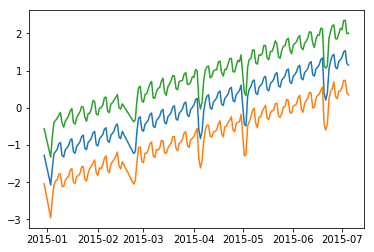

In [0]:
x1 = forecast['ds']
y1 = forecast['yhat']
y2 = forecast['yhat_lower']
y3 = forecast['yhat_upper']
plt.plot(x1,y1)
plt.plot(x1,y2)
plt.plot(x1,y3)
plt.show()

In [0]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
print(forecast[['yhat']].tail()*df['x'].std()+df['x'].mean())

            ds      yhat  yhat_lower  yhat_upper
0   2014-12-30 -1.276656   -2.042851   -0.563422
1   2015-01-03 -2.071375   -2.958874   -1.325003
2   2015-01-04 -1.630160   -2.448361   -0.778744
3   2015-01-05 -1.228142   -2.080471   -0.393916
4   2015-01-06 -1.177880   -1.964185   -0.339156
5   2015-01-07 -1.112108   -1.942556   -0.280551
6   2015-01-08 -0.969043   -1.780522   -0.195199
7   2015-01-09 -0.930513   -1.778752   -0.125266
8   2015-01-10 -1.281470   -2.116116   -0.413440
9   2015-01-11 -1.321431   -2.115398   -0.519382
10  2015-01-12 -1.129366   -1.952521   -0.357495
11  2015-01-13 -1.079104   -1.884095   -0.291670
12  2015-01-14 -1.013332   -1.835060   -0.210432
13  2015-01-15 -0.870267   -1.677265   -0.081129
14  2015-01-16 -0.831737   -1.628268   -0.016849
15  2015-01-17 -1.182694   -2.004588   -0.397877
16  2015-01-18 -1.222655   -2.028150   -0.437547
17  2015-01-19 -1.030590   -1.842529   -0.259534
18  2015-01-20 -0.980328   -1.823873   -0.183828
19  2015-01-21 -0.91